SUS_01_23b.xlsx

In [21]:
#%pip install statsmodels

In [22]:

import pandas as pd 

# Nalozi podatke iz lokalne datoteke
fn = 'SUS_01_23b.xlsx'

df = pd.read_excel(fn)
df

# Po zgornji definiciji izračunamo stolpce Odd, Even in SUS
df['Odd'] = df['Q1']+df['Q3']+df['Q5']+df['Q7']+df['Q9'] - 5
df['Even'] = 25 - (df['Q2']+df['Q4']+df['Q6']+df['Q8']+df['Q10'])
df['SUS'] = (df['Odd'] + df['Even']) * 2.5



Normalna porazd p:  0.2235837766471623


(0.1687685911321154, 0.2235837766471623)

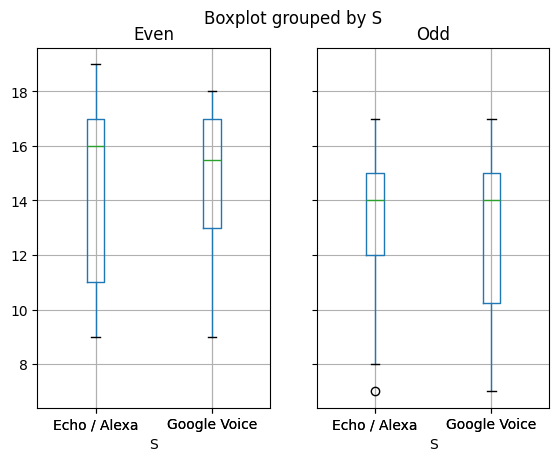

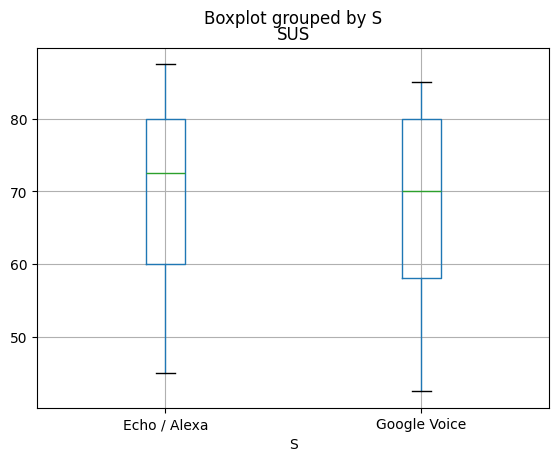

In [23]:
# Definiramo indekse skupin (Google, Alexa)
# Skupine 
S1 = df['S']=='Echo / Alexa'
S2 = df['S']=='Google Voice'

# Izrišemo rezultate po skupinah (boxplot)
df.boxplot(by='S', column=['Even','Odd'])
df.boxplot(by='S', column=['SUS'])

# Preverimo s statističnim testom, ali je porazdelitev rezultatov normalna : 
# https://www.statsmodels.org/devel/generated/statsmodels.stats.diagnostic.lilliefors.html
# liliefors : Ali je porazdelitev normalna, p > 0.05
#%pip install statsmodels

from statsmodels.stats.diagnostic import lilliefors

S1lil = lilliefors(df[S1]['SUS'])
print("Normalna porazd p: ", S1lil[1])
S1lil

       
       
       
       





In [ ]:
# Vstavi rezultate, ali je normalna porazdelitev:

# Preveri, ali je razlika med sistemi. Izračunaj p-faktor in interpretiraj rezultat.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
# H0 : ničelna hipoteza, povprečja za oba sistema so enaka (ni razlike), (p>0.05)
# Delovna hipoteza: povprečja se razlikujejo, med sistemi je razlika (p<0.05)

# TTest ničelna hipoteza: ni razlike med sistemi, p>0.05
from scipy import stats
ttest_result = stats.ttest_rel(df[S1]['SUS'], df[S2]['SUS'])
print("TTest p-value: ", ttest_result.pvalue)

# Zanesljivost rezultata preverimo s Cronbach alpha faktorjem. Če je ta nad 0.7 lahko smatramo rezultat kot zanesljiv. 
# https://pingouin-stats.org/build/html/generated/pingouin.cronbach_alpha.html
# https://real-statistics.com/reliability/internal-consistency-reliability/cronbachs-alpha/cronbachs-alpha-basic-concepts/
# pip install pingouin --user


Arrays have unequal lengths after dropping NaN values.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy import stats
import numpy as np


# Nalozi podatke iz lokalne datoteke
fn = 'SUS_01a.xlsx'

df = pd.read_excel(fn)
print("Podatki:")
print(df.head())

# Po zgornji definiciji izračunamo stolpce Odd, Even in SUS
df['Odd'] = df['Q1'] + df['Q3'] + df['Q5'] + df['Q7'] + df['Q9'] - 5
df['Even'] = 25 - (df['Q2'] + df['Q4'] + df['Q6'] + df['Q8'] + df['Q10'])
df['SUS'] = (df['Odd'] + df['Even']) * 2.5

# Definiramo indekse skupin (Google, Alexa)
# Skupine 
S1 = df['S'] == 'Echo / Alexa'
S2 = df['S'] == 'Google Voice'

# Izrišemo rezultate po skupinah (boxplot)
plt.figure(figsize=(10, 5))
df.boxplot(by='S', column=['Even','Odd'])
plt.title('SUS Odd in Even Skupine')
plt.suptitle('')
plt.xlabel('Sistem')
plt.ylabel('Točke')
plt.show()

plt.figure(figsize=(6, 5))
df.boxplot(by='S', column=['SUS'])
plt.title('SUS Skupine')
plt.suptitle('')
plt.xlabel('Sistem')
plt.ylabel('SUS Točke')
plt.show()

# Preverimo s statističnim testom, ali je porazdelitev rezultatov normalna : 
# liliefors : Ali je porazdelitev normalna, p > 0.05
S1lil = lilliefors(df[S1]['SUS'])
print("Normalna porazd p za Echo/Alexa:", S1lil[1])

# Preveri, ali je razlika med sistemi. Izračunaj p-faktor in interpretiraj rezultat.
# H0 : ničelna hipoteza, povprečja za oba sistema so enaka (ni razlike), (p>0.05)
# Delovna hipoteza: povprečja se razlikujejo, med sistemi je razlika (p<0.05)

# TTest ničelna hipoteza: ni razlike med sistemi, p>0.05
ttest_result = stats.ttest_rel(df[S1]['SUS'], df[S2]['SUS'])
print("TTest Result:", ttest_result)

# Komentar
print("\n### Komentar ###")
print("Na podlagi Lillieforsovega testa normalnosti porazdelitve je p-vrednost:", S1lil[1])
if S1lil[1] > 0.05:
    print("Porazdelitev SUS ocen za Echo/Alexa je normalna.")
else:
    print("Porazdelitev SUS ocen za Echo/Alexa ni normalna.")

print("\nRezultat T-testa:")
print("T-statistika:", ttest_result.statistic)
print("P-vrednost:", ttest_result.pvalue)
if ttest_result.pvalue > 0.05:
    print("Ni statistično značilne razlike med SUS ocenami za Echo/Alexa in Google Voice.")
else:
    print("Obstaja statistično značilna razlika med SUS ocenami za Echo/Alexa in Google Voice.")

# Zanesljivost rezultata preverimo s Cronbach alpha faktorjem. Če je ta nad 0.7 lahko smatramo rezultat kot zanesljiv. 
# Cronbach alpha
# Predpostavimo, da SUISQ vsebuje naslednja vprašanja za faktorje UGO, CSB, SC, V
# Potrebno je prilagoditi glede na dejansko strukturo podatkov

# Primer definicije vprašanj za faktorje
# UGO: Q11, Q12, Q13
# CSB: Q14, Q15, Q16
# SC: Q17, Q18, Q19
# V: Q20, Q21, Q22

# Tukaj prilagodite imena vprašanj glede na vaše podatke
# Primer:
# df['Q11'], df['Q12'], df['Q13'] -> UGO
# df['Q14'], df['Q15'], df['Q16'] -> CSB
# df['Q17'], df['Q18'], df['Q19'] -> SC
# df['Q20'], df['Q21'], df['Q22'] -> V

# Tukaj bom predpostavil, da so vprašanja Q11-Q22
# Če imate drugačna imena, jih prilagodite

# Izračun faktorjev
# Definirajte katera vprašanja pripadajo kateri faktor

# Primer:
UGO_questions = ['Q11', 'Q12', 'Q13']
CSB_questions = ['Q14', 'Q15', 'Q16']
SC_questions = ['Q17', 'Q18', 'Q19']
V_questions = ['Q20', 'Q21', 'Q22']

# Obratni rezultati (V_r)
# Predpostavimo, da je Q22 obratno skoriran
df['Q22_r'] = df['Q22'].max() + df['Q22'].min() - df['Q22']

# Izračun faktorjev po definiciji teh faktorjev:
df['UGO'] = df[UGO_questions].mean(axis=1)
df['CSB'] = df[CSB_questions].mean(axis=1)
df['SC'] = df[SC_questions].mean(axis=1)
df['V'] = df[V_questions].mean(axis=1)  # V_r je že vključeno v Q22_r, prilagodite če je potrebno

# Rezultat: izračunani faktorji (tabela)
faktorji = df[['UGO', 'CSB', 'SC', 'V', 'S']]
print("\nIzračunani faktorji:")
print(faktorji.head())

# Izriši boxplot faktorjev po sistemih (Aleksa, Google)
plt.figure(figsize=(12, 8))
faktorji.melt(id_vars='S', value_vars=['UGO', 'CSB', 'SC', 'V'], var_name='Faktor', value_name='Točke').boxplot(by='Faktor', column=['Točke'], grid=False, figsize=(12, 8))
plt.title('Boxplot Faktorjev po Sistemih')
plt.suptitle('')
plt.xlabel('Faktor')
plt.ylabel('Točke')
plt.show()

# 2.4 Primerjaj sistema Aleksa, Google za 4 faktorje
# Statistični T test za posamezne faktorje (ali velja ničelna ali delovna hipoteza):

# Definiraj funkcijo za T-test in komentar
def ttest_faktor(faktor):
    data_a = df[S1][faktor]
    data_b = df[S2][faktor]
    ttest = stats.ttest_rel(data_a, data_b)
    print(f"\nT-test za faktor '{faktor}':")
    print(f"T-statistika: {ttest.statistic:.4f}, P-vrednost: {ttest.pvalue:.4f}")
    if ttest.pvalue > 0.05:
        print("Ni statistično značilne razlike med faktorji za oba sistema.")
    else:
        print("Obstaja statistično značilna razlika med faktorji za oba sistema.")

# Izvede T-test za vsak faktor
for faktor in ['UGO', 'CSB', 'SC', 'V']:
    ttest_faktor(faktor)

# Zanesljivost faktorjev s Cronbach alpha
print("\n### Zanesljivost Faktorjev ###")

def cronbach_alpha(df):
    df_corr = df.corr()
    n_items = len(df.columns)
    avg_corr = df_corr.mean().mean()
    return (n_items * avg_corr) / (1 + (n_items - 1) * avg_corr)

# Primer za UGO
UGO_data = df[UGO_questions]
UGO_cronbach = cronbach_alpha(UGO_data)
print(f"UGO Cronbach alpha: {UGO_cronbach:.4f}")

# Primer za CSB
CSB_data = df[CSB_questions]
CSB_cronbach = cronbach_alpha(CSB_data)
print(f"CSB Cronbach alpha: {CSB_cronbach:.4f}")

# Primer za SC
SC_data = df[SC_questions]
SC_cronbach = cronbach_alpha(SC_data)
print(f"SC Cronbach alpha: {SC_cronbach:.4f}")

# Primer za V
V_data = df[V_questions]
V_cronbach = cronbach_alpha(V_data)
print(f"V Cronbach alpha: {V_cronbach:.4f}")

ModuleNotFoundError: No module named 'pingouin'